# - Predict with Decision tree algorithm

In [1]:
%matplotlib inline
#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Data processing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
# 10000, 1, 100

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('../dataset/afterPreprocessing.csv')
df.shape

(7986, 22)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   7986 non-null   int64  
 1   aluminium    7986 non-null   float64
 2   ammonia      7986 non-null   float64
 3   arsenic      7986 non-null   float64
 4   barium       7986 non-null   float64
 5   cadmium      7986 non-null   float64
 6   chloramine   7986 non-null   float64
 7   chromium     7986 non-null   float64
 8   copper       7986 non-null   float64
 9   flouride     7986 non-null   float64
 10  bacteria     7986 non-null   float64
 11  viruses      7986 non-null   float64
 12  lead         7986 non-null   float64
 13  nitrates     7986 non-null   float64
 14  nitrites     7986 non-null   float64
 15  mercury      7986 non-null   float64
 16  perchlorate  7986 non-null   float64
 17  radium       7986 non-null   float64
 18  selenium     7986 non-null   float64
 19  silver

In [4]:
df

Unnamed: 0  aluminium  ammonia  arsenic  barium  cadmium  chloramine  \
0              0       1.65     9.08     0.04    2.85    0.007        0.35   
1              1       2.32    21.16     0.01    3.31    0.002        5.28   
2              2       1.01    14.02     0.04    0.58    0.008        4.24   
3              3       1.36    11.33     0.04    2.96    0.001        7.23   
4              4       0.92    24.33     0.03    0.20    0.006        2.67   
...          ...        ...      ...      ...     ...      ...         ...   
7981        7994       0.05     7.78     0.00    1.95    0.040        0.10   
7982        7995       0.05    24.22     0.02    0.59    0.010        0.45   
7983        7996       0.09     6.85     0.00    0.61    0.030        0.05   
7984        7997       0.01    10.00     0.01    2.00    0.000        2.00   
7985        7998       0.04     6.85     0.01    0.70    0.030        0.05   

      chromium  copper  flouride  ...   lead  nitrates  nitrites  mercury  \
0         0.83    0.17      0.05  ...  0.054     16.08      1.13    0.007   
1         0.68    0.66      0.90  ...  0.100      2.01      1.93    0.003   
2         0.53    0.02      0.99  ...  0.078     14.16      1.11    0.006   
3         0.03    1.66      1.08  ...  0.016      1.41      1.29    0.004   
4         0.69    0.57      0.61  ...  0.117      6.74      1.11    0.003   
...        ...     ...       ...  ...    ...       ...       ...      ...   
7981      0.03    0.03      1.37  ...  0.197     14.29      1.00    0.005   
7982      0.02    0.02      1.48  ...  0.031     10.27      1.00    0.001   
7983      0.05    0.02      0.91  ...  0.182     15.92      1.00    0.000   
7984      0.00    0.09      0.00  ...  0.000      0.00      0.00    0.000   
7985      0.01    0.03      1.00  ...  0.182     15.92      1.00    0.000   

      perchlorate  radium  selenium  silver  uranium  class  
0           37.75    6.78      0.08    0.34     0.02      1  
1           32.26    3.21      0.08    0.27     0.05      1  
2           50.28    7.07      0.07    0.44     0.01      0  
3            9.12    1.72      0.02    0.45     0.05      1  
4           16.90    2.41      0.02    0.06     0.02      1  
...           ...     ...       ...     ...      ...    ...  
7981         3.57    2.13      0.09    0.06     0.03      1  
7982         1.48    1.11      0.09    0.10     0.08      1  
7983         1.35    4.84      0.00    0.04     0.05      1  
7984         0.00    0.00      0.00    0.00     0.00      1  
7985         1.35    4.84      0.00    0.04     0.05      1  

[7986 rows x 22 columns]

In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df['class'].unique()

array([1, 0], dtype=int64)

In [7]:
X = df.drop('class', axis=1)
y = df['class']

In [8]:
X

aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7981       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
7982       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7983       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
7984       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
7985       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  viruses   lead  nitrates  nitrites  mercury  \
0       0.17      0.05      0.20    0.000  0.054     16.08      1.13    0.007   
1       0.66      0.90      0.65    0.650  0.100      2.01      1.93    0.003   
2       0.02      0.99      0.05    0.003  0.078     14.16      1.11    0.006   
3       1.66      1.08      0.71    0.710  0.016      1.41      1.29    0.004   
4       0.57      0.61      0.13    0.001  0.117      6.74      1.11    0.003   
...      ...       ...       ...      ...    ...       ...       ...      ...   
7981    0.03      1.37      0.00    0.000  0.197     14.29      1.00    0.005   
7982    0.02      1.48      0.00    0.000  0.031     10.27      1.00    0.001   
7983    0.02      0.91      0.00    0.000  0.182     15.92      1.00    0.000   
7984    0.09      0.00      0.00    0.000  0.000      0.00      0.00    0.000   
7985    0.03      1.00      0.00    0.000  0.182     15.92      1.00    0.000   

      perchlorate  radium  selenium  silver  uranium  
0           37.75    6.78      0.08    0.34     0.02  
1           32.26    3.21      0.08    0.27     0.05  
2           50.28    7.07      0.07    0.44     0.01  
3            9.12    1.72      0.02    0.45     0.05  
4           16.90    2.41      0.02    0.06     0.02  
...           ...     ...       ...     ...      ...  
7981         3.57    2.13      0.09    0.06     0.03  
7982         1.48    1.11      0.09    0.10     0.08  
7983         1.35    4.84      0.00    0.04     0.05  
7984         0.00    0.00      0.00    0.00     0.00  
7985         1.35    4.84      0.00    0.04     0.05  

[7986 rows x 20 columns]

In [9]:
y

0       1
1       1
2       0
3       1
4       1
       ..
7981    1
7982    1
7983    1
7984    1
7985    1
Name: class, Length: 7986, dtype: int64

# 1 - Build model with Decision tree algorithm

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Initialize the Decision Tree classifier
dt_classifier_gini = DecisionTreeClassifier(random_state=42,max_depth=3)
dt_classifier_entropy = DecisionTreeClassifier(random_state=42,max_depth=3, criterion='entropy')
# Train the model on the training set
dt_classifier_gini.fit(X_train, y_train)
dt_classifier_entropy.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gini = dt_classifier_gini.predict(X_test)
y_pred_entropy = dt_classifier_entropy.predict(X_test)
# Evaluate the accuracy of the model
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Decision Tree with gini criterion Accuracy: {accuracy_gini}")
print(f"Decision Tree with entropy criterion Accuracy: {accuracy_entropy}")

Decision Tree with gini criterion Accuracy: 0.9457429048414023
Decision Tree with entropy criterion Accuracy: 0.9311352253756261


### - Choose fit depth with good accuracy score and little depth

In [12]:
#Find the best max-depth for DT algorithm
# Define a range of max_depth values to iterate over
max_depth_values = range(3, 20)  # You can adjust this range

# Initialize variables to keep track of the best max depth and corresponding score
best_max_depth = None
best_score = 0.0

In [13]:
# Iterate over different max_depth values
for max_depth in max_depth_values:
    # Initialize the DecisionTreeClassifier with the current max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    # Evaluate the model on the test data
    test_score = clf.score(X_test, y_test)
    # Perform cross-validation on the training data
    #cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    # Print the score for the current max_depth
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Check if the current model has a better score than the previous best
    if test_score > best_score:
        best_score = test_score
        best_max_depth = max_depth

# Print the best max depth and corresponding score
print(f'Decision Tree with gini criterion')
print(f"Best Max Depth = {best_max_depth}: Best Test Score = {best_score}")

Max Depth = 3: Test Score = 0.9457429048414023
Max Depth = 4: Test Score = 0.9528380634390651
Max Depth = 5: Test Score = 0.9578464106844741
Max Depth = 6: Test Score = 0.9574290484140233
Max Depth = 7: Test Score = 0.9565943238731218
Max Depth = 8: Test Score = 0.9524207011686143
Max Depth = 9: Test Score = 0.9507512520868113
Max Depth = 10: Test Score = 0.9432387312186978
Max Depth = 11: Test Score = 0.9507512520868113
Max Depth = 12: Test Score = 0.9490818030050083
Max Depth = 13: Test Score = 0.9490818030050083
Max Depth = 14: Test Score = 0.9478297161936561
Max Depth = 15: Test Score = 0.9494991652754591
Max Depth = 16: Test Score = 0.9490818030050083
Max Depth = 17: Test Score = 0.9528380634390651
Max Depth = 18: Test Score = 0.9494991652754591
Max Depth = 19: Test Score = 0.9499165275459098
Decision Tree with gini criterion
Best Max Depth = 5: Best Test Score = 0.9578464106844741


=> Choose 3

In [14]:
# Iterate over different max_depth values
for max_depth in max_depth_values:
    # Initialize the DecisionTreeClassifier with the current max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42, criterion='entropy')
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    # Evaluate the model on the test data
    test_score = clf.score(X_test, y_test)
    # Perform cross-validation on the training data
    #cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    # Print the score for the current max_depth
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Check if the current model has a better score than the previous best
    if test_score > best_score:
        best_score = test_score
        best_max_depth = max_depth

# Print the best max depth and corresponding score
print(f'Decision Tree with entropy criterion')
print(f"Best Max Depth = {best_max_depth}: Best Test Score = {best_score}")

Max Depth = 3: Test Score = 0.9311352253756261
Max Depth = 4: Test Score = 0.9503338898163606
Max Depth = 5: Test Score = 0.9590984974958264
Max Depth = 6: Test Score = 0.9620200333889817
Max Depth = 7: Test Score = 0.9607679465776294
Max Depth = 8: Test Score = 0.9636894824707847
Max Depth = 9: Test Score = 0.9653589315525877
Max Depth = 10: Test Score = 0.9636894824707847
Max Depth = 11: Test Score = 0.9632721202003339
Max Depth = 12: Test Score = 0.9636894824707847
Max Depth = 13: Test Score = 0.9611853088480802
Max Depth = 14: Test Score = 0.9624373956594324
Max Depth = 15: Test Score = 0.9628547579298832
Max Depth = 16: Test Score = 0.9641068447412354
Max Depth = 17: Test Score = 0.9620200333889817
Max Depth = 18: Test Score = 0.9616026711185309
Max Depth = 19: Test Score = 0.9616026711185309
Decision Tree with entropy criterion
Best Max Depth = 9: Best Test Score = 0.9653589315525877


=> Choose 3

In [15]:
dt_classifier_gini = DecisionTreeClassifier(random_state=42,max_depth=3)
dt_classifier_entropy = DecisionTreeClassifier(random_state=42,max_depth=3, criterion='entropy')
# Train the model on the training set
dt_classifier_gini.fit(X_train, y_train)
dt_classifier_entropy.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gini = dt_classifier_gini.predict(X_test)
y_pred_entropy = dt_classifier_entropy.predict(X_test)
# Evaluate the accuracy of the model
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Decision Tree with gini criterion Accuracy: {accuracy_gini}")
print(f"Decision Tree with entropy criterion Accuracy: {accuracy_entropy}")

Decision Tree with gini criterion Accuracy: 0.9457429048414023
Decision Tree with entropy criterion Accuracy: 0.9311352253756261


### - Visualize The Decision tree with gini criterion and entropy criterion

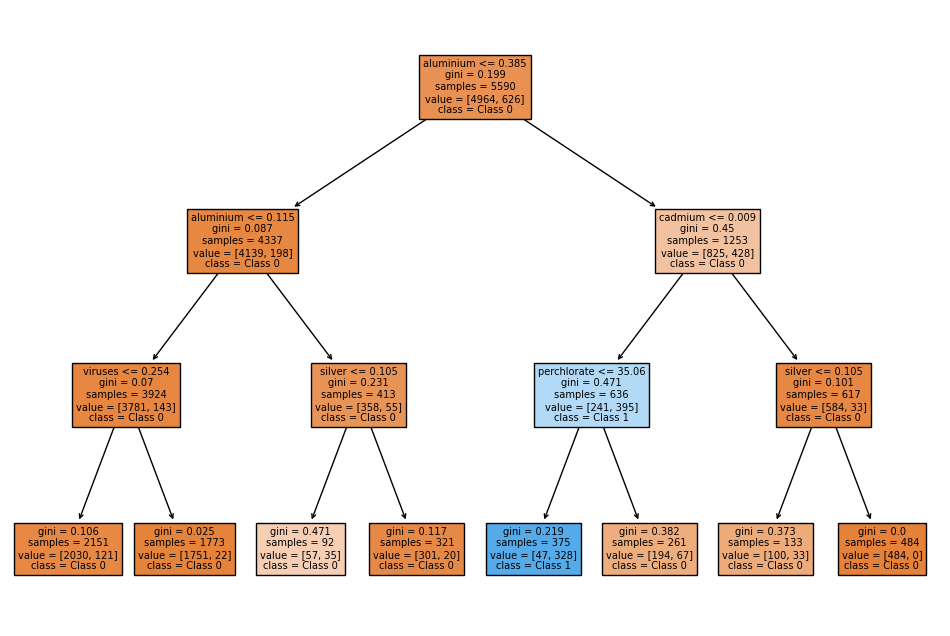

In [16]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier_gini, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1"])
plt.show()

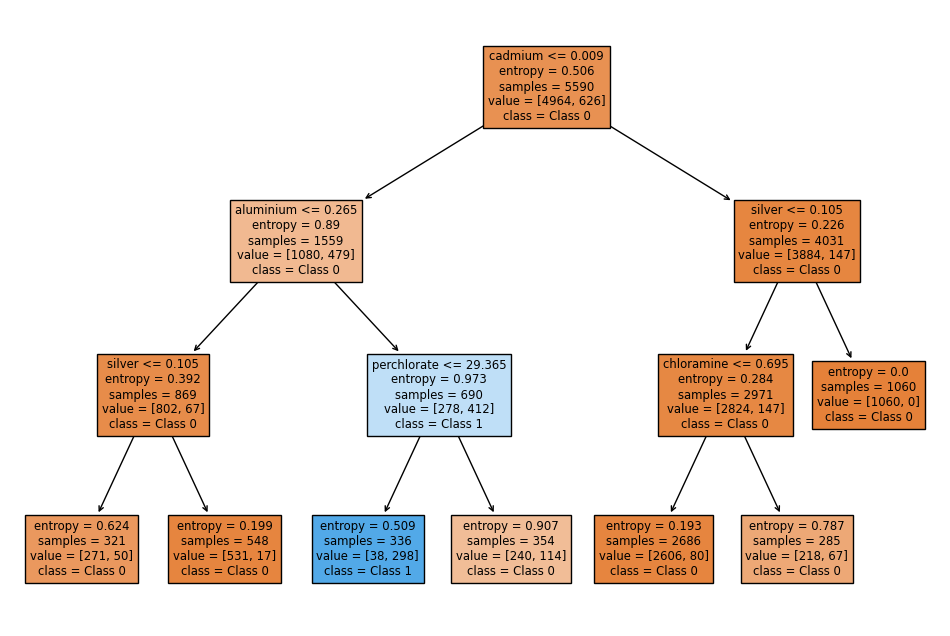

In [17]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier_entropy, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1"])
plt.show()

### - Decision tree rule

In [18]:
from sklearn.tree import export_text
# Export the text representation of the decision tree
tree_rules = export_text(dt_classifier_gini, feature_names=X.columns.tolist())
print(tree_rules)

|--- aluminium <= 0.38
|   |--- aluminium <= 0.11
|   |   |--- viruses <= 0.25
|   |   |   |--- class: 0
|   |   |--- viruses >  0.25
|   |   |   |--- class: 0
|   |--- aluminium >  0.11
|   |   |--- silver <= 0.11
|   |   |   |--- class: 0
|   |   |--- silver >  0.11
|   |   |   |--- class: 0
|--- aluminium >  0.38
|   |--- cadmium <= 0.01
|   |   |--- perchlorate <= 35.06
|   |   |   |--- class: 1
|   |   |--- perchlorate >  35.06
|   |   |   |--- class: 0
|   |--- cadmium >  0.01
|   |   |--- silver <= 0.11
|   |   |   |--- class: 0
|   |   |--- silver >  0.11
|   |   |   |--- class: 0



In [19]:
tree_rules = export_text(dt_classifier_entropy, feature_names=X.columns.tolist())
print(tree_rules)

|--- cadmium <= 0.01
|   |--- aluminium <= 0.27
|   |   |--- silver <= 0.11
|   |   |   |--- class: 0
|   |   |--- silver >  0.11
|   |   |   |--- class: 0
|   |--- aluminium >  0.27
|   |   |--- perchlorate <= 29.36
|   |   |   |--- class: 1
|   |   |--- perchlorate >  29.36
|   |   |   |--- class: 0
|--- cadmium >  0.01
|   |--- silver <= 0.11
|   |   |--- chloramine <= 0.69
|   |   |   |--- class: 0
|   |   |--- chloramine >  0.69
|   |   |   |--- class: 0
|   |--- silver >  0.11
|   |   |--- class: 0



# 2 - Performence evalution

### - Confusion matrix

#### - Decision tree with gini criterion

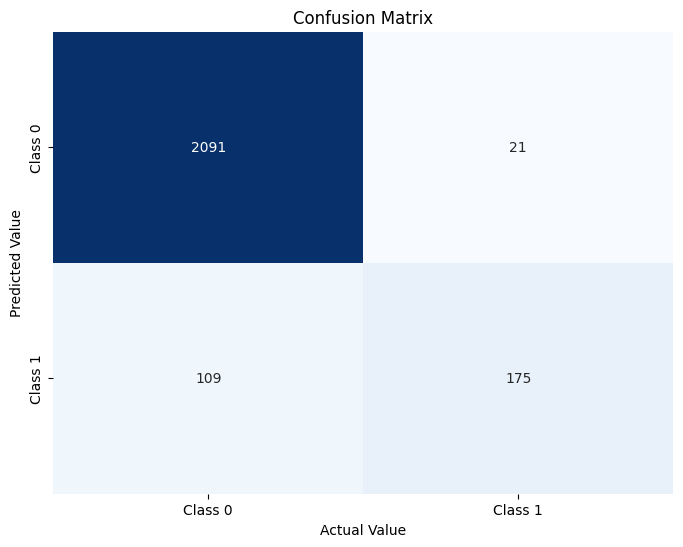

In [20]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_gini)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Confusion Matrix')
plt.show()

In [21]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2112
           1       0.89      0.62      0.73       284

    accuracy                           0.95      2396
   macro avg       0.92      0.80      0.85      2396
weighted avg       0.94      0.95      0.94      2396



#### - Decision tree with entropy criterion

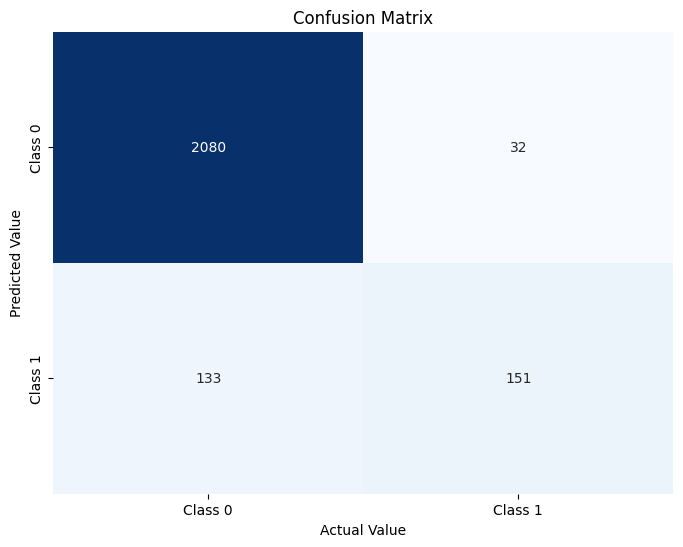

In [22]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_entropy)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Confusion Matrix')
plt.show()

In [23]:
print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2112
           1       0.83      0.53      0.65       284

    accuracy                           0.93      2396
   macro avg       0.88      0.76      0.80      2396
weighted avg       0.93      0.93      0.92      2396



## - Cross Validation

### - Decision tree with gini criterion

In [24]:
from sklearn.model_selection import cross_val_score
# Perform 10-fold cross-validation
scores = cross_val_score(dt_classifier_gini, X, y, cv=10)
# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

Cross-Validation Scores: [0.59073842 0.57571965 0.85857322 0.97622028 0.97997497 0.97622028
 0.96616541 0.89974937 0.88596491 0.88596491]
Mean CV Score: 0.859529142003946


### - Decision tree with entropy criterion

In [25]:
scores = cross_val_score(dt_classifier_entropy, X, y, cv=10)
# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

Cross-Validation Scores: [0.59073842 0.95369212 0.85857322 0.96996245 0.97121402 0.96996245
 0.95864662 0.89849624 0.88596491 0.88596491]
Mean CV Score: 0.8943215360052197
